In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/cleaned_data/final_data.csv')

In [3]:
df.shape

(39254, 3)

In [4]:
real = df[df['Label']==1]
fake = df[df['Label']==0]

In [5]:
real.shape, fake.shape

((18555, 3), (20699, 3))

In [6]:
n = 5000  #chunk row size

In [7]:
def chunks(dataframe):
    name = [dataframe[i:i+n] for i in range(0,dataframe.shape[0],n)]
    return name
    
    
    

In [8]:
real_chunks = chunks(real)
[real_chunks[i].shape for i in range(0,4)]

[(5000, 3), (5000, 3), (5000, 3), (3555, 3)]

In [9]:
fake_chunks = chunks(fake)
[fake_chunks[i].shape for i in range(0,4)]

[(5000, 3), (5000, 3), (5000, 3), (5000, 3)]

In [10]:
training_chunk1 = pd.concat([real_chunks[0],fake_chunks[0]])
training_chunk1 = training_chunk1.sample(frac=1).reset_index(drop=True)
training_chunk1

,title,text,Label
0,tension rise north dakota pipeline trump set ...,tension increased week near construction site...,1
1,billboard bay area confirms time impeach trump,billboard bay area confirms time impeach trum...,0
2,texas lawmaker file crucial bill could save c...,tuesday senator jose menendez dsan antonio fi...,0
3,canada obama watch new prime minister call pr...,global wussification male identifying feminis...,0
4,former nypd vip security detail say hillary d...,almost scary idea hillary would lie major hea...,0
...,...,...,...
9995,northern ireland life inside fountain,william jackson remembers exodus vividly prot...,1
9996,sweden brink collapse gun purchase way uppepp...,politically correct country sweden paying big...,0
9997,family living traditional lifestyle torn apar...,conform pay ultimate price police seized ten ...,0
9998,trump us tragedy congratulate video,case know explosion lower manhattan saturday ...,0


<AxesSubplot:xlabel='Label', ylabel='count'>

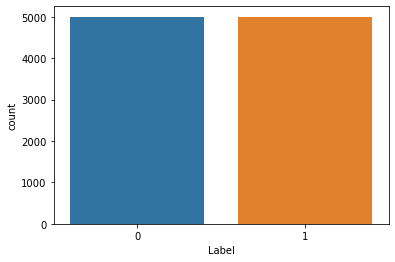

In [11]:
sns.countplot(x= training_chunk1['Label'])

In [12]:
training_chunk2 = pd.concat([real_chunks[1],fake_chunks[1]])
training_chunk2 = training_chunk2.sample(frac=1).reset_index(drop=True)
training_chunk2

,title,text,Label
0,new museum selects rem koolhaas expansion bowery,photothe new museum may relatively modest bud...,1
1,macron sharp tongue throw french twitter frenzy,emmanuel macron age brought youth vigor frenc...,1
2,utah republican defend romney bannons mormon jab,utah republican wednesday rallied around mitt...,1
3,tillerson warns region using lebanon proxy co...,secretary state rex tillerson friday warned c...,1
4,mainstream republican fret trump cruz strengt...,two week first contest presidential race repu...,1
...,...,...,...
9995,trump asks supreme court block travel ban ruling,justice department friday asked supreme court...,1
9996,senate pass bill boost travel security brussels,senate tuesday overwhelmingly approved legisl...,1
9997,hamas say security chief wounded gaza car bom...,hamas security chief gaza strip wounded car b...,1
9998,trump get handed whining unfair protest,million american vote donald trump tuesday ni...,0


In [13]:
testing_chunk1 = pd.concat([real_chunks[2],fake_chunks[2]])
testing_chunk1 = testing_chunk1.sample(frac=1).reset_index(drop=True)
testing_chunk1

,title,text,Label
0,republican ryan raising big money white house...,overlooked speculation running president repu...,1
1,chicitysports fantasy review week fantasy foo...,chicitysports fantasy review week fantasy foo...,0
2,insane gop congressman want mentally ill gun ...,year saneminded individual congress alongside...,0
3,ohio vfw ban nfls cleveland brown viewing ant...,vfw strongsville ohio right exercising freedo...,0
4,yankee new weapon postseason run,yankee new weapon postseason runbefore newsaa...,0
...,...,...,...
9995,prof trump fmr college he true threat america...,donald trump like brag fact attended universi...,0
9996,minority trump supporter thrown maxine water ...,video begin hispanic man telling videographer...,0
9997,trump expected order temporary ban refugee,president donald trump expected sign executiv...,1
9998,liberal imperium quigleys angloamerican estab...,jay dyer century wirethis addendum lecture la...,0


In [14]:
testing_chunk2 = pd.concat([real_chunks[3],fake_chunks[3]])
testing_chunk2 = testing_chunk2.sample(frac=1).reset_index(drop=True)
testing_chunk2

,title,text,Label
0,watch trump criticizing time person year poli...,even though former reality show star turned p...,0
1,someone call waaambulance glenn beck warns he...,hey glenn suicide laughing matter really need...,0
2,washington post call maine governor resign,washington post wednesday called maine govern...,1
3,bannon call sen bob corker resign,former white house chief strategist steve ban...,1
4,dead broke hillary hit swanky salon entourage...,wait thought dead broke like everyday america...,0
...,...,...,...
8550,week ranking top wide receiver,week ranking top wide receiver reader think s...,0
8551,battered coal industry hope trump prepares cl...,republican presidential nominee donald trump ...,1
8552,trump blast former scottish leader war word g...,republican presidential candidate donald trum...,1
8553,episode sunday wire ground zero syria guest t...,episode sunday wire show resume sunday septem...,0


In [15]:
training_chunk1.to_csv('data/training_chunks/training_chunk1.csv',index=False)
training_chunk2.to_csv('data/training_chunks/training_chunk2.csv',index=False)
testing_chunk1.to_csv('data/testing_chunks/testing_chunk1.csv',index=False)
testing_chunk2.to_csv('data/testing_chunks/testing_chunk2.csv',index=False)